In [41]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("The CIFAR10 database has a training set of %d examples." % len(x_train))
print("The CIFAR10 database has a test set of %d examples." % len(x_test))

The CIFAR10 database has a training set of 50000 examples.
The CIFAR10 database has a test set of 10000 examples.


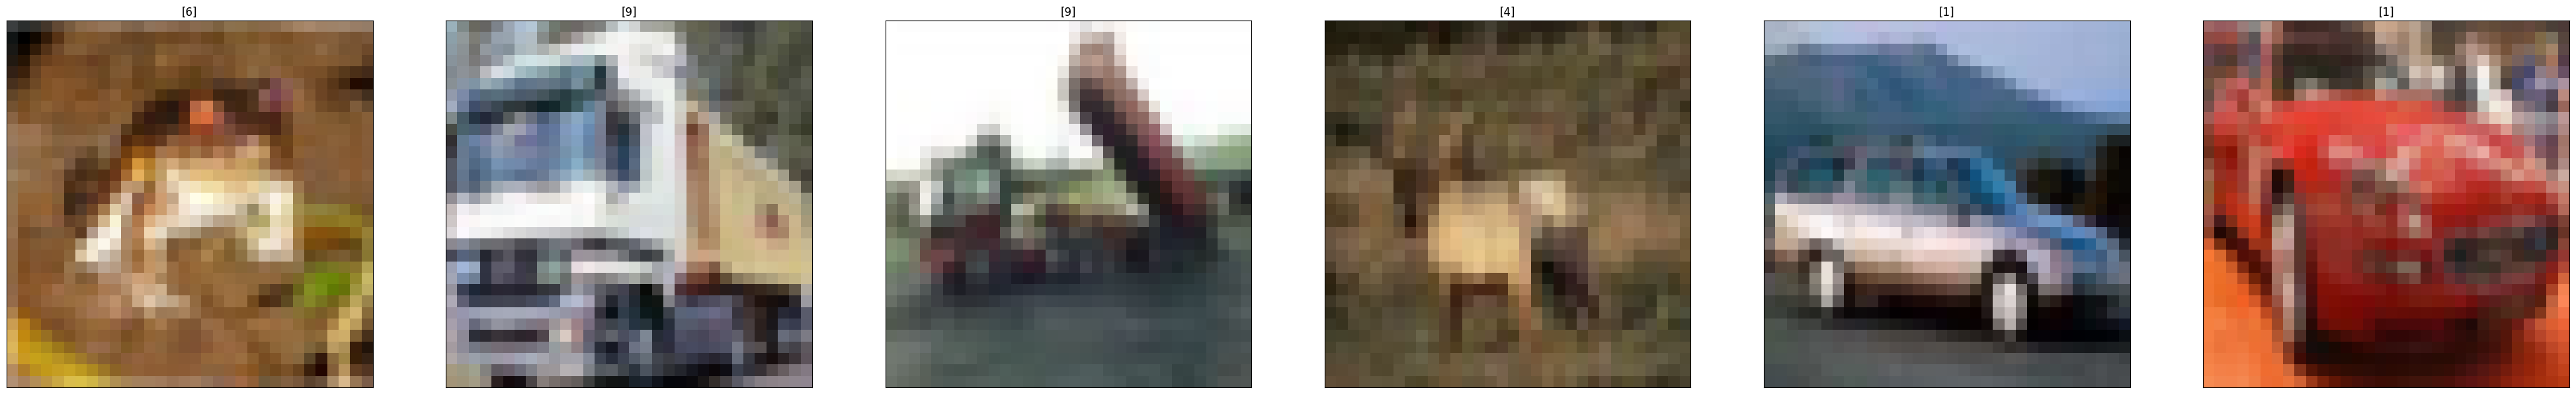

In [42]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(50,50))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(str(y_train[i]))

In [44]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

print('X_train shape:', x_train.shape)

X_train shape: (50000, 32, 32, 3)


In [45]:
from tensorflow.keras.utils import to_categorical

num_classes = 10 
print('Integer-valued labels:')
print(y_train[:10])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [61]:
img_rows, img_cols, channel = 32, 32, 3

input_shape = (img_rows, img_cols, channel)

print('input_shape: ', input_shape)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

input_shape:  (32, 32, 3)
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same',
activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [55]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.color.conv.dropout.keras', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 2.30277, saving model to model.weights.color.conv.dropout.keras
1563/1563 - 19s - 12ms/step - accuracy: 0.0989 - loss: 2.3032 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/15

Epoch 2: val_loss improved from 2.30277 to 2.30263, saving model to model.weights.color.conv.dropout.keras
1563/1563 - 17s - 11ms/step - accuracy: 0.0992 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/15

Epoch 3: val_loss improved from 2.30263 to 2.30263, saving model to model.weights.color.conv.dropout.keras
1563/1563 - 16s - 10ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/15

Epoch 4: val_loss improved from 2.30263 to 2.30261, saving model to model.weights.color.conv.dropout.keras
1563/1563 - 16s - 10ms/step - accuracy: 0.0965 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/15

Epoch 5: val_loss did not improve from 2.30261
1563/1563 - 16s - 10ms/step - accuracy: 0.0984 - loss

In [56]:
model.load_weights('model.weights.color.conv.dropout.keras')

In [57]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 10.0000%


In [58]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


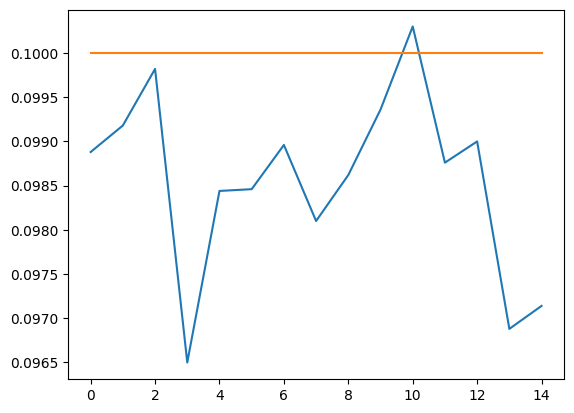

In [59]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.show()

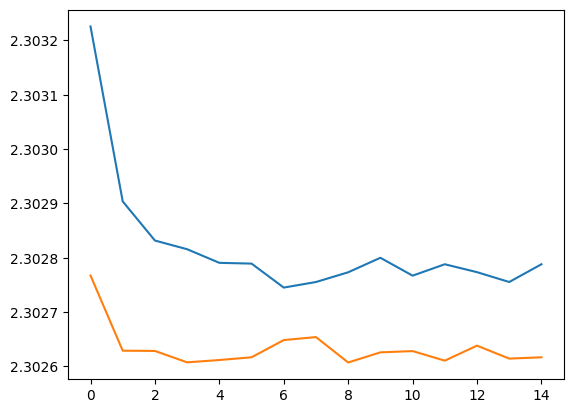

In [60]:
plt.plot(hist.history['loss'], label='Train losss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.show()

Normalisation

In [63]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [64]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer2 = ModelCheckpoint(filepath='model.weights.color.normalised.conv.dropout.keras', verbose=1, 
                               save_best_only=True)
hist2 = model.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer2], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.17753, saving model to model.weights.color.normalised.conv.dropout.keras
1563/1563 - 15s - 9ms/step - accuracy: 0.4723 - loss: 1.4623 - val_accuracy: 0.5802 - val_loss: 1.1775
Epoch 2/15

Epoch 2: val_loss improved from 1.17753 to 1.07772, saving model to model.weights.color.normalised.conv.dropout.keras
1563/1563 - 13s - 8ms/step - accuracy: 0.5882 - loss: 1.1658 - val_accuracy: 0.6206 - val_loss: 1.0777
Epoch 3/15

Epoch 3: val_loss improved from 1.07772 to 1.03530, saving model to model.weights.color.normalised.conv.dropout.keras
1563/1563 - 14s - 9ms/step - accuracy: 0.6292 - loss: 1.0608 - val_accuracy: 0.6372 - val_loss: 1.0353
Epoch 4/15

Epoch 4: val_loss improved from 1.03530 to 0.91105, saving model to model.weights.color.normalised.conv.dropout.keras
1563/1563 - 14s - 9ms/step - accuracy: 0.6513 - loss: 1.0012 - val_accuracy: 0.6850 - val_loss: 0.9111
Epoch 5/15

Epoch 5: val_loss improved from 0.91105 to 0.90162, saving m

In [65]:
model.load_weights('model.weights.color.normalised.conv.dropout.keras')
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 71.0300%


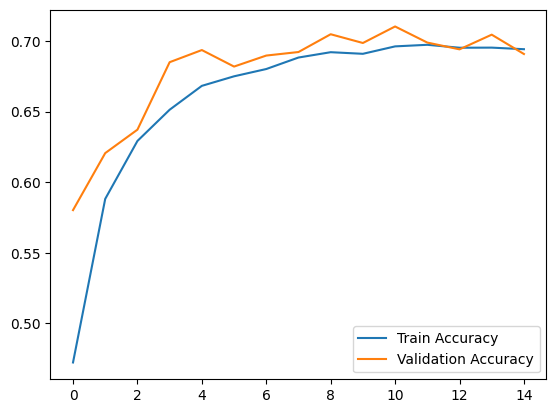

In [70]:
plt.plot(hist2.history['accuracy'], label='Train Accuracy')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

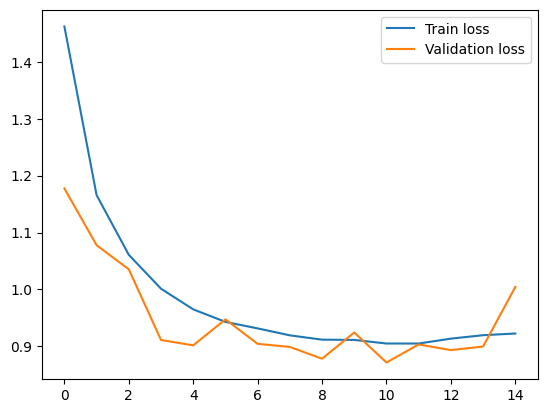

In [72]:
plt.plot(hist2.history['loss'], label='Train loss')
plt.plot(hist2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [75]:
from keras import regularizers
weight_decay =  1e-4 
regularizers.l2(weight_decay)
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay),
activation='relu', input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=32, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay),
activation='relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=64, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay),
activation='relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
checkpointer3 = ModelCheckpoint(filepath='model.weights.color.conv.dropout.l2.keras', verbose=1, 
                               save_best_only=True)
hist3 = model3.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer3], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.16749, saving model to model.weights.color.conv.dropout.l2.keras
1563/1563 - 15s - 10ms/step - accuracy: 0.4816 - loss: 1.4450 - val_accuracy: 0.5894 - val_loss: 1.1675
Epoch 2/15

Epoch 2: val_loss improved from 1.16749 to 0.99918, saving model to model.weights.color.conv.dropout.l2.keras
1563/1563 - 13s - 8ms/step - accuracy: 0.5965 - loss: 1.1425 - val_accuracy: 0.6517 - val_loss: 0.9992
Epoch 3/15

Epoch 3: val_loss improved from 0.99918 to 0.99233, saving model to model.weights.color.conv.dropout.l2.keras
1563/1563 - 13s - 8ms/step - accuracy: 0.6379 - loss: 1.0356 - val_accuracy: 0.6582 - val_loss: 0.9923
Epoch 4/15

Epoch 4: val_loss improved from 0.99233 to 0.92612, saving model to model.weights.color.conv.dropout.l2.keras
1563/1563 - 13s - 8ms/step - accuracy: 0.6608 - loss: 0.9837 - val_accuracy: 0.6918 - val_loss: 0.9261
Epoch 5/15

Epoch 5: val_loss did not improve from 0.92612
1563/1563 - 13s - 8ms/step - accuracy: 0.677

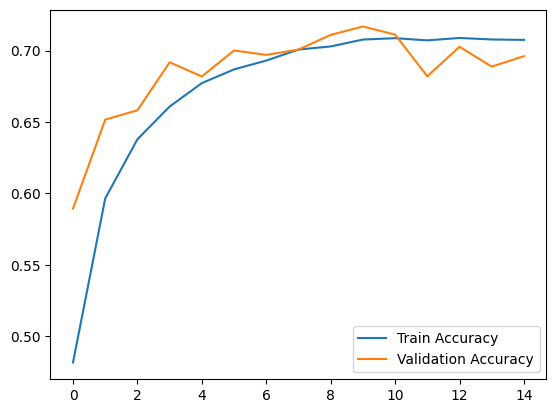

In [77]:
plt.plot(hist3.history['accuracy'], label='Train Accuracy')
plt.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

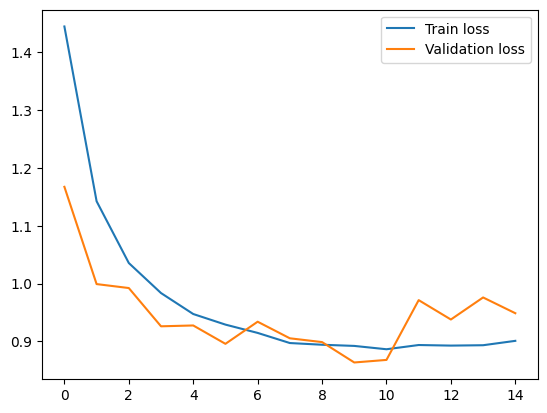

In [78]:
plt.plot(hist3.history['loss'], label='Train loss')
plt.plot(hist3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [79]:
model3.load_weights('model.weights.color.conv.dropout.l2.keras')
score = model3.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 71.6900%
